In [1]:
import cospar as cs
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dynamo as dyn
import scvelo as scv

|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [2]:
#sc.settings.set_figure_params(dpi=100, facecolor='white')
cs.settings.set_figure_params()

In [3]:
gw15_rep1 = sc.read('/media/chang/HDD-8/chang/cloneseq/GW15_rep1.h5ad')

In [4]:
gw15_rep1

AnnData object with n_obs × n_vars = 39963 × 37481
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'ident', 'cxds_score', 'bcds_score', 'hybrid_score', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'clone', 'n_clone', 'percent.mt', 'Sample', 'short_clone', 'nCount_SCT', 'nFeature_SCT', 'seurat_clusters', 'clusters'
    obsm: 'X_pca'
    layers: 'spliced', 'unspliced'

In [5]:
cs.pp.get_X_clone(gw15_rep1,gw15_rep1.obs.index.tolist(),gw15_rep1.obs.short_clone.tolist())

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39963/39963 [00:30<00:00, 1292.07it/s]


In [9]:
old_to_new = dict(
    EN='EN',
    IN_CGE='IN_CGE',
    IN_IPC='IN_IPC',
    IPC="IPC",
    IPC_EN="IPC_EN",
    OPC="OPC",
    RG_CRYAB='RG_CRYAB',
    RG_HOPX="RG_HOPX",
    Div="IPC"
)
gw15_rep1.obs['state_info'] = (
    gw15_rep1.obs['clusters']
    .map(old_to_new)
    .astype('category')
)
gw15_rep1.obs['state_info']

AAACCCAAGCGATGGT_1      IN_CGE
AAACCCAAGCGCCGTT_1         IPC
AAACCCAAGGGTGAGG_1    RG_CRYAB
AAACCCAAGGTCGAGT_1    RG_CRYAB
AAACCCAAGTGCACCC_1         IPC
                        ...   
TTTGTTGGTCTAGATC_3      IN_CGE
TTTGTTGGTGCACATT_3         IPC
TTTGTTGGTGGTCTAT_3      IN_IPC
TTTGTTGTCACGACTA_3         IPC
TTTGTTGTCCACGTAA_3     RG_HOPX
Name: state_info, Length: 39963, dtype: category
Categories (8, object): ['EN', 'IN_CGE', 'IN_IPC', 'IPC', 'IPC_EN', 'OPC', 'RG_CRYAB', 'RG_HOPX']

In [13]:
cycling_gene_list=['Ube2c', 'Hmgb2', 'Hmgn2', 'Tuba1b', 'Ccnb1', 'Tubb5', 'Top2a', 'Tubb4b']
cycling_gene_list = [x.upper() for x in cycling_gene_list]
cycling_gene_list

['UBE2C', 'HMGB2', 'HMGN2', 'TUBA1B', 'CCNB1', 'TUBB5', 'TOP2A', 'TUBB4B']

Finding highly variable genes...


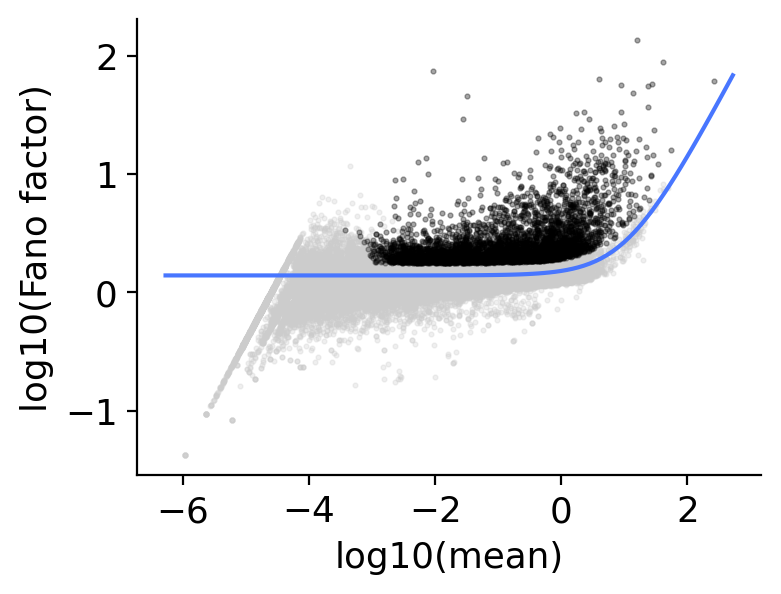

Keeping 3906 genes
Error: Provided cyclcing genes: ['UBE2C', 'HMGB2', 'HMGN2', 'TUBA1B', 'CCNB1', 'TUBB5', 'TOP2A', 'TUBB4B']
They are for mouse genes. Only 7 found in the reference gene list.


In [14]:
cs.pp.get_highly_variable_genes(gw15_rep1)
cs.pp.remove_cell_cycle_correlated_genes(gw15_rep1,cycling_gene_list)
cs.pp.get_X_pca(gw15_rep1)
cs.pp.get_X_emb(gw15_rep1)

In [21]:
gw15_rep1.uns["data_des"] = "/media/chang/HDD-8/chang/cloneseq/cospar"

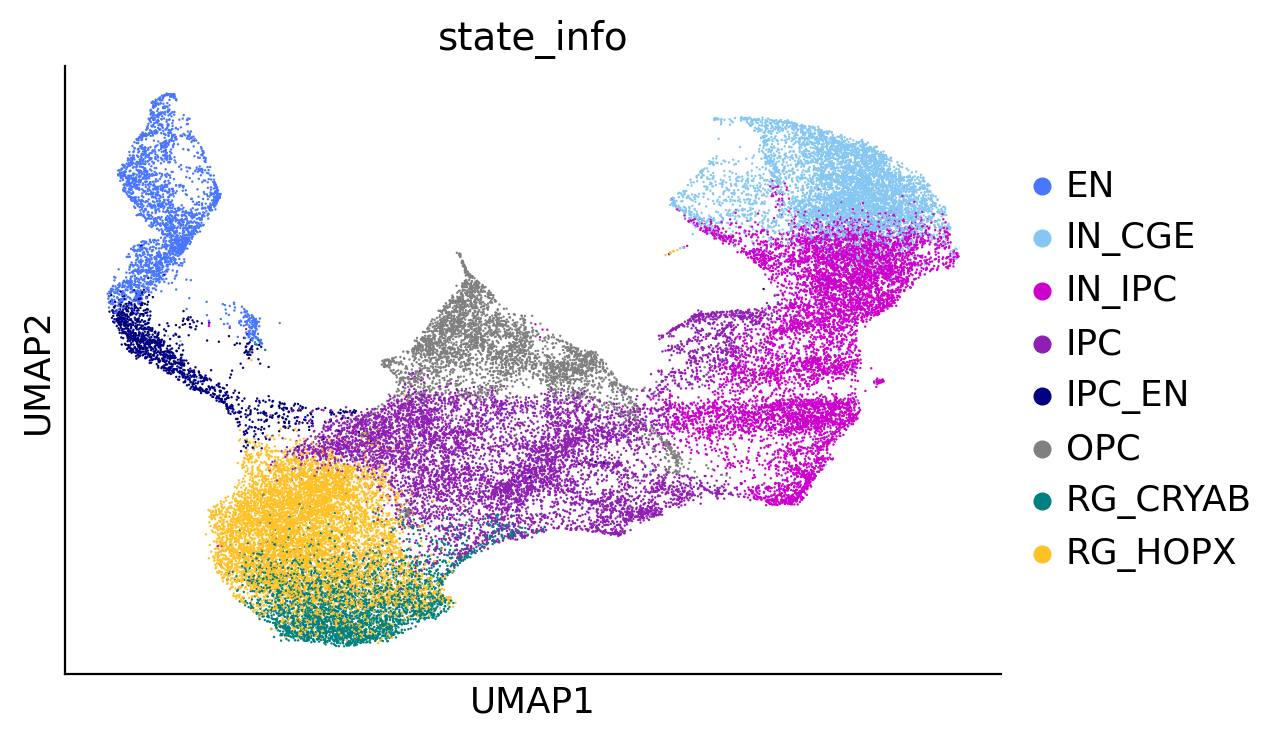

In [35]:
sc.pl.umap(gw15_rep1,  color=['clusters', 'orig.ident'])

Data saved at adata.uns['barcode_heatmap']


<AxesSubplot:>

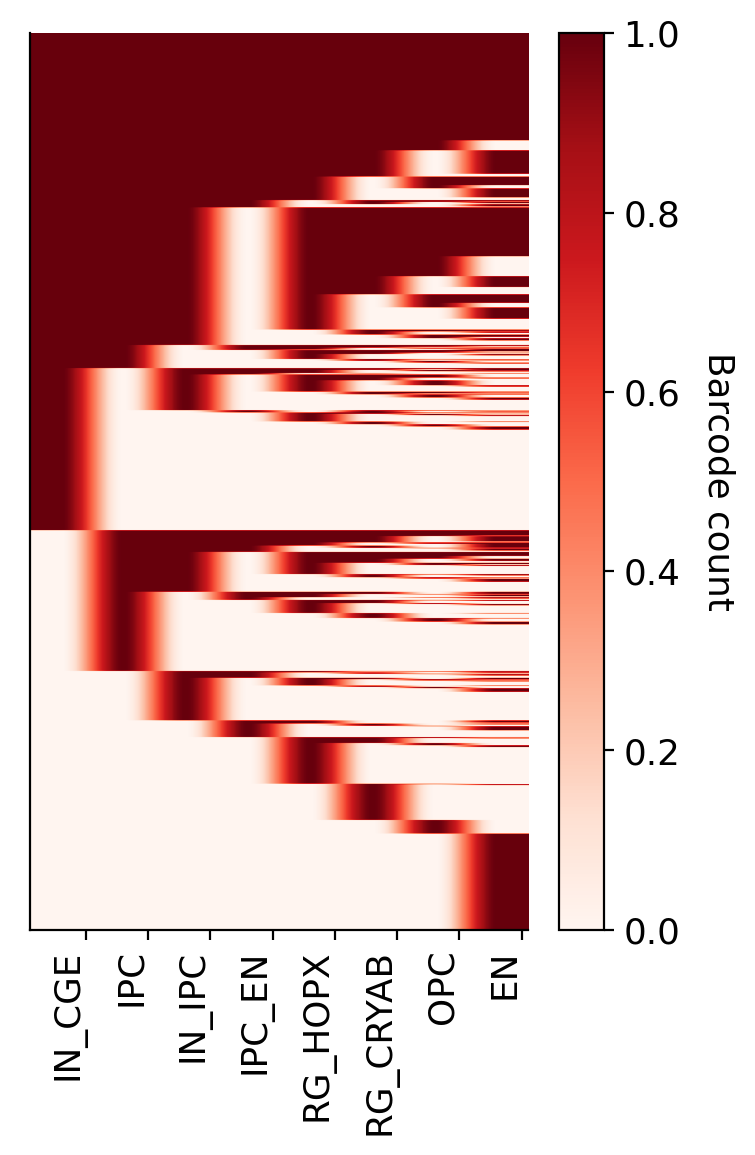

In [22]:
cs.pl.barcode_heatmap(gw15_rep1,selected_times=None,
        color_bar=True,log_transform=False,binarize=True)

Results saved as dictionary at adata.uns['fate_coupling_X_clone']


<AxesSubplot:title={'center':'source: X_clone'}>

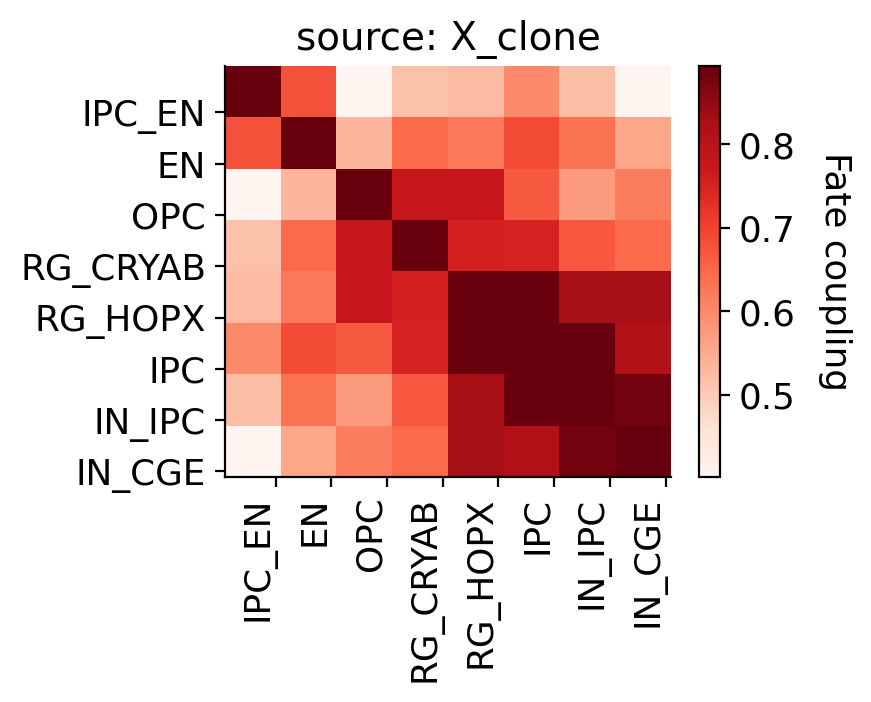

In [26]:
cs.tl.fate_coupling(gw15_rep1,source='X_clone') # compute the fate coupling
cs.pl.fate_coupling(gw15_rep1,source='X_clone') # actually plot the coupling

In [28]:
cs.tl.fate_hierarchy(gw15_rep1,source='X_clone') # compute the fate hierarchy
cs.pl.fate_hierarchy(gw15_rep1,source='X_clone') # actually plot the hierarchy

Results saved as dictionary at adata.uns['fate_hierarchy_X_clone']

            /-OPC
         /-|
        |   \-RG_CRYAB
        |
      /-|      /-IN_IPC
     |  |   /-|
     |  |  |   \-IN_CGE
     |   \-|
   /-|     |   /-RG_HOPX
  |  |      \-|
  |  |         \-IPC
--|  |
  |   \-EN
  |
   \-IPC_EN


In [ ]:
cs.tl.clonal_fate_bias(gw15_rep1,selected_fate='IN_IPC',alternative='two-sided') # compute the fate hierarchy
cs.pl.clonal_fate_bias(gw15_rep1) # actually plot the hierarchy

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 1537/1981 [00:28<00:08, 52.32it/s]

In [ ]:
result=gw15_rep1.uns['clonal_fate_bias']
result

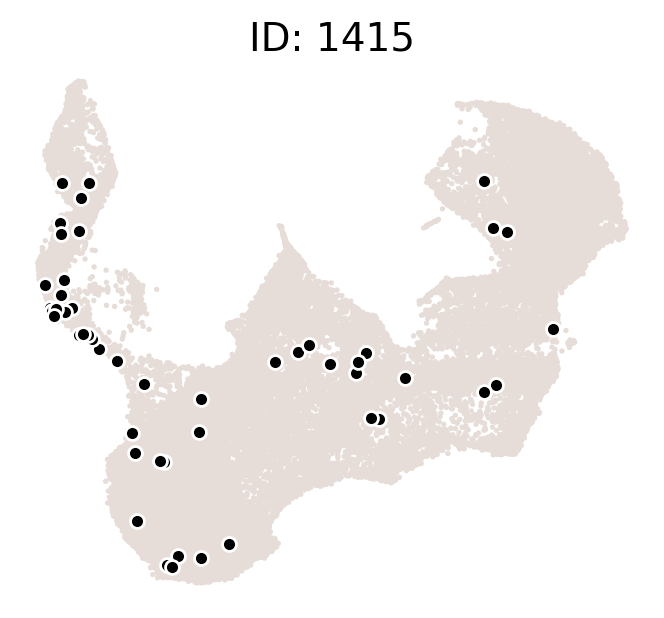

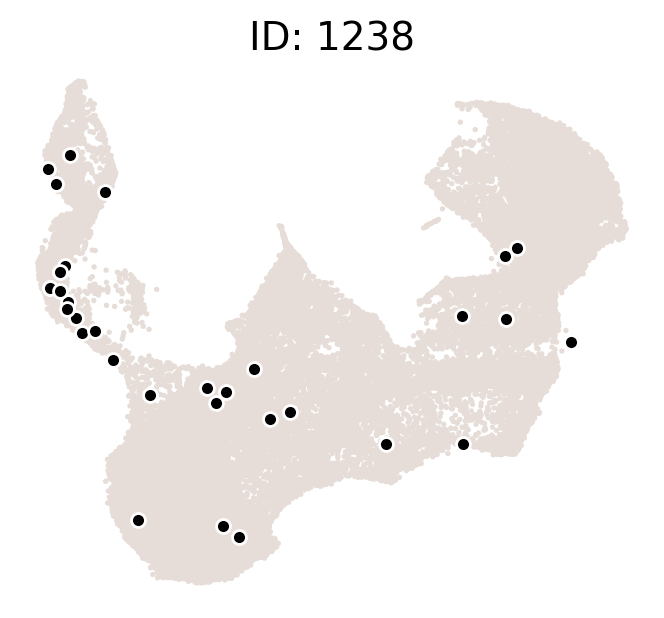

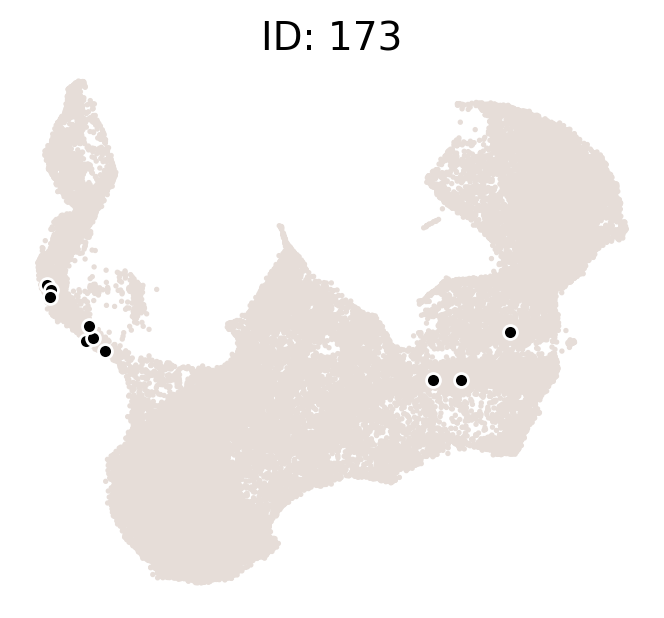

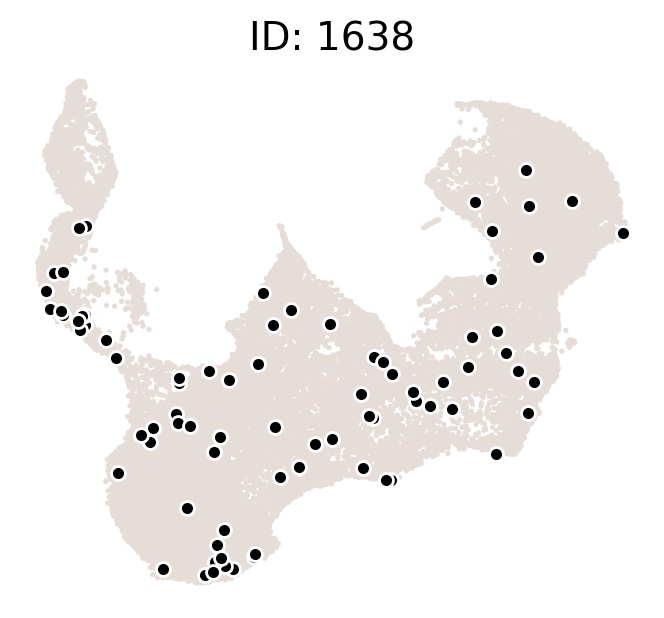

In [42]:
ids=result['Clone_ID'][:4]
cs.pl.clones_on_manifold(gw15_rep1,selected_clone_list=ids,color_list=['black','red','blue'],clone_markersize=10)

In [ ]:
gw15_rep1=cs.tmap.infer_Tmap_from_clonal_info_alone(gw15_rep1,method='weinreb',later_time_point='6',selected_fates=selected_fates)

In [ ]:
cs.tl.fate_coupling(adata,selected_fates=selected_fates,source='transition_map')
cs.pl.fate_coupling(adata,source='transition_map')

In [ ]:
cs.tl.fate_hierarchy(adata,selected_fates=selected_fates,source='transition_map')
cs.pl.fate_hierarchy(adata,source='transition_map')

In [18]:
gw15_rep1.obs["time_info"] = 1
gw15_rep1.obs["time_info"][2] = 2
gw15_rep1.obs["time_info"][3] = 3
gw15_rep1.obs.time_info = pd.Categorical(gw15_rep1.obs.time_info)

In [71]:
#gw15_rep1=cs.tmap.infer_Tmap_from_clonal_info_alone(gw15_rep1,clonal_time_points=None,later_time_point=None)

In [38]:
adata = sc.read('/media/chang/HDD-8/chang/cloneseq/GW15_rep1.h5ad')

In [77]:
#scv.pl.proportions(adata)

In [40]:
#scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000, enforce=True)
scv.pp.filter_genes(adata)
scv.pp.normalize_per_cell(adata, enforce=True)
scv.pp.filter_genes_dispersion(adata)
scv.pp.log1p(adata)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Normalized count data: X, spliced, unspliced.
Extracted 4408 highly variable genes.
computing neighbors
    finished (0:00:07) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:14) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


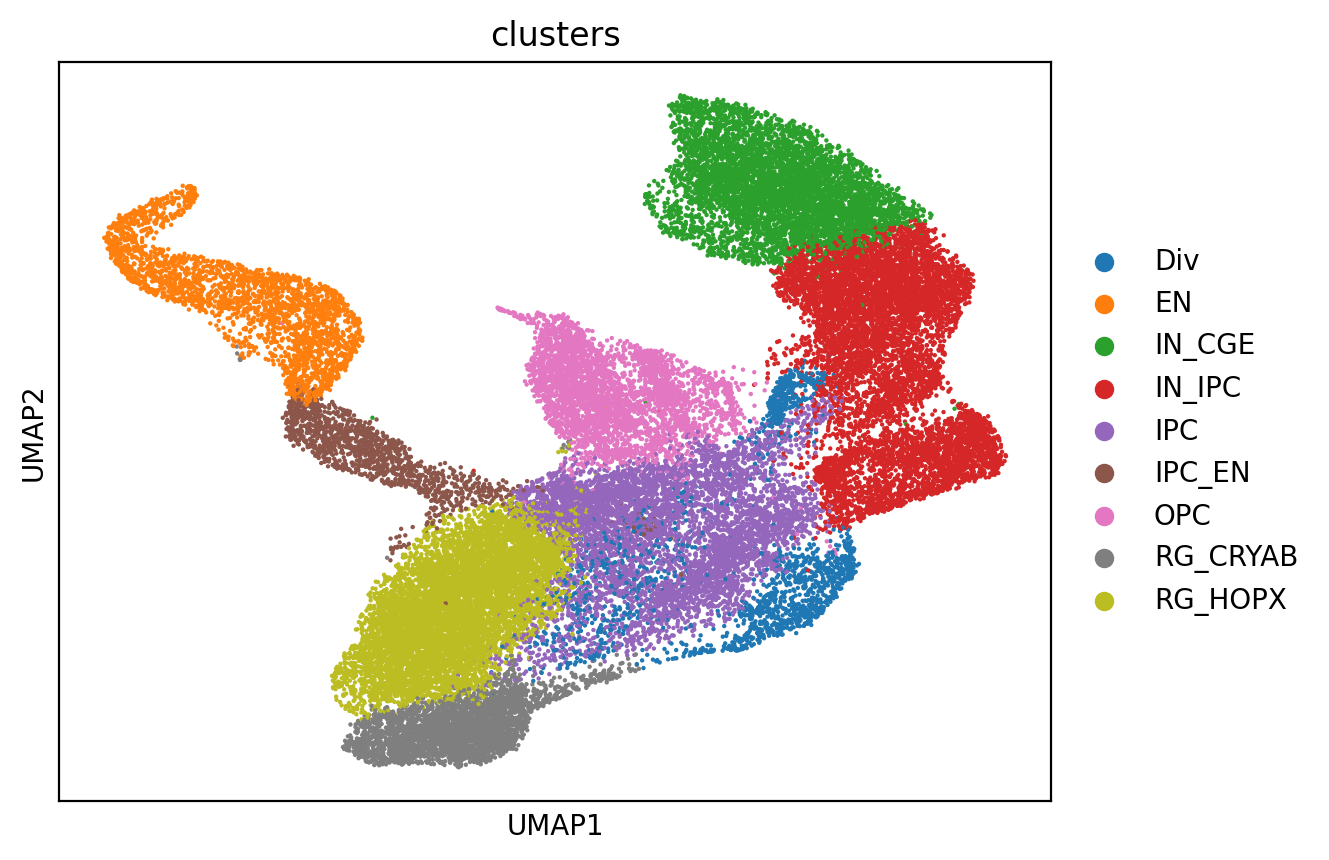

In [44]:
#sc.tl.umap(adata, min_dist=.5, spread = 1)
sc.pl.umap(adata, color=['clusters'], size=10)

In [45]:
scv.tl.recover_dynamics(adata, n_jobs=64)

recovering dynamics (using 64/128 cores)


  0%|          | 0/1507 [00:00<?, ?gene/s]

    finished (0:04:59) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [46]:
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata, n_jobs=64)

computing velocities
    finished (0:00:37) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/128 cores)


  0%|          | 0/39963 [00:00<?, ?cells/s]

    finished (0:02:21) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


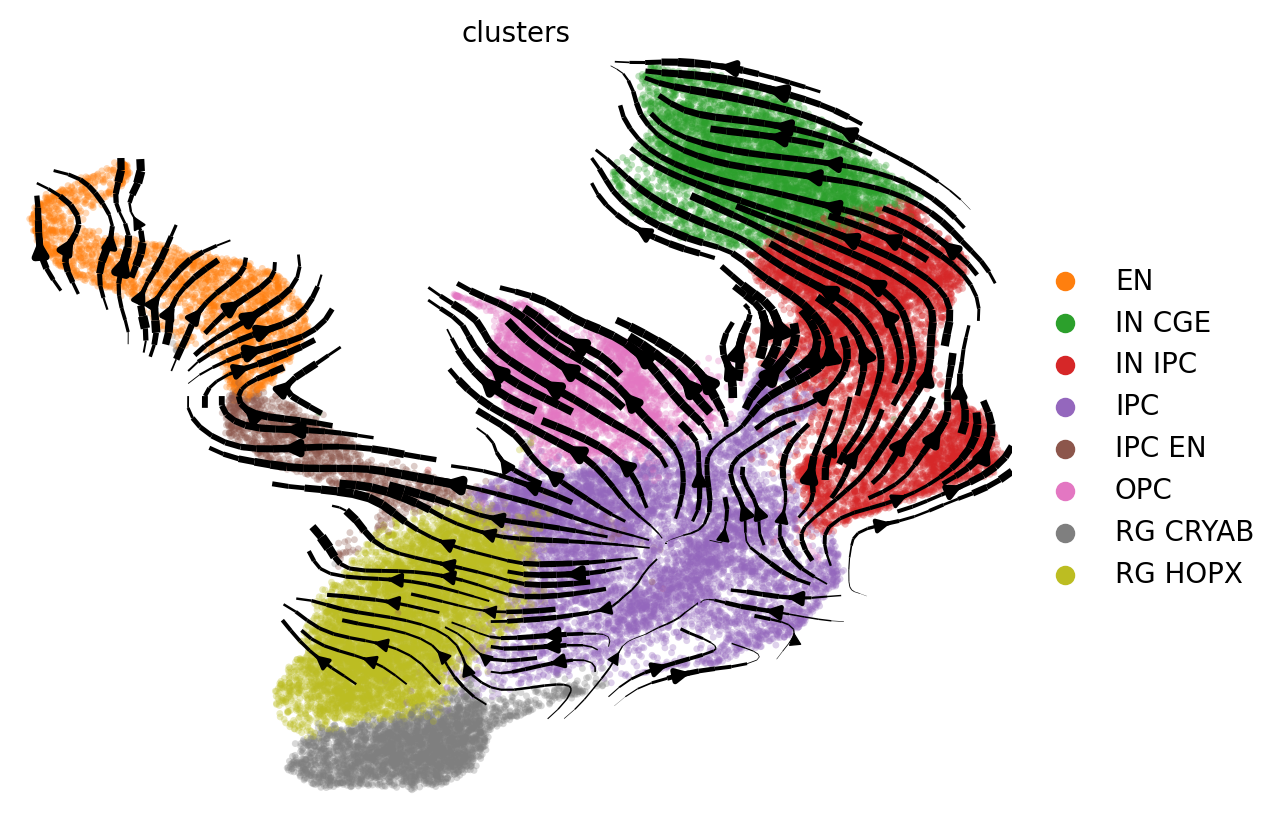

In [81]:
scv.pl.velocity_embedding_stream(adata, basis='umap', legend_loc='right margin', 
                                 dpi=100, linewidth=2, color='clusters')#, alpha=.7, size=200,frameon=True, xlim=(-2,12), ylim=(-1,12))

In [ ]:
old_to_new = dict(
    "EN"='EN',
    "IN_CGE"='IN_CGE',
    "IN_IPC"='IN_IPC',
    "IPC"="IPC",
    "IPC_EN"="IPC_EN",
    "OPC"="OPC",
    'RG_CRYAB'='RG_CRYAB',
    "RG_HOPX"="RG_HOPX",
    "Div"="IPC"
)
adata.obs['state_info'] = (
    adata.obs['clusters']
    .map(old_to_new)
    .astype('category')
)

In [70]:
adata.obs.clusters[adata.obs.clusters == "Div"] = "IPC"

In [80]:
adata.obs.clusters = pd.Categorical(adata.obs.clusters)
adata.obs.clusters

AAACCCAAGCGATGGT_1      IN_CGE
AAACCCAAGCGCCGTT_1         IPC
AAACCCAAGGGTGAGG_1    RG_CRYAB
AAACCCAAGGTCGAGT_1    RG_CRYAB
AAACCCAAGTGCACCC_1         IPC
                        ...   
TTTGTTGGTCTAGATC_3      IN_CGE
TTTGTTGGTGCACATT_3         IPC
TTTGTTGGTGGTCTAT_3      IN_IPC
TTTGTTGTCACGACTA_3         IPC
TTTGTTGTCCACGTAA_3     RG_HOPX
Name: clusters, Length: 39963, dtype: category
Categories (9, object): ['Div', 'EN', 'IN_CGE', 'IN_IPC', ..., 'IPC_EN', 'OPC', 'RG_CRYAB', 'RG_HOPX']

In [72]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:50]
scv.tl.differential_kinetic_test(adata, var_names=top_genes, groupby='clusters')

testing for differential kinetics
    finished (0:01:12) --> added 
    'fit_diff_kinetics', clusters displaying differential kinetics (adata.var)
    'fit_pvals_kinetics', p-values of differential kinetics (adata.var)


In [73]:
scv.tl.velocity(adata, diff_kinetics=True)
scv.tl.velocity_graph(adata, n_jobs=64)

computing velocities
    finished (0:00:24) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 64/128 cores)


  0%|          | 0/39963 [00:00<?, ?cells/s]

    finished (0:00:53) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:10) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


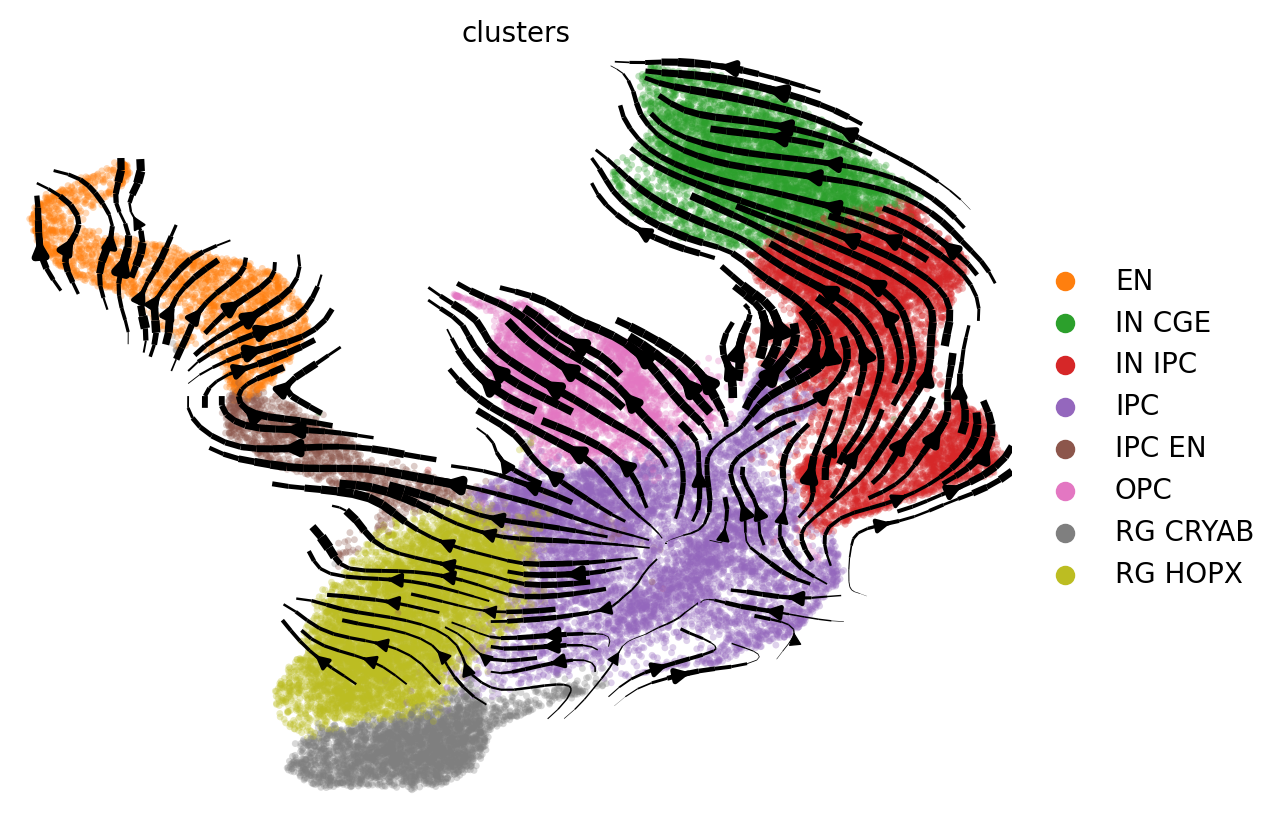

In [74]:
scv.pl.velocity_embedding_stream(adata, basis='umap', legend_loc='right margin', 
                                 dpi=100, linewidth=2, color='clusters')#, alpha=.7, size=200,frameon=True, xlim=(-2,12), ylim=(-1,12))

computing latent time using root_cells as prior
    finished (0:00:16) --> added 
    'latent_time', shared time (adata.obs)


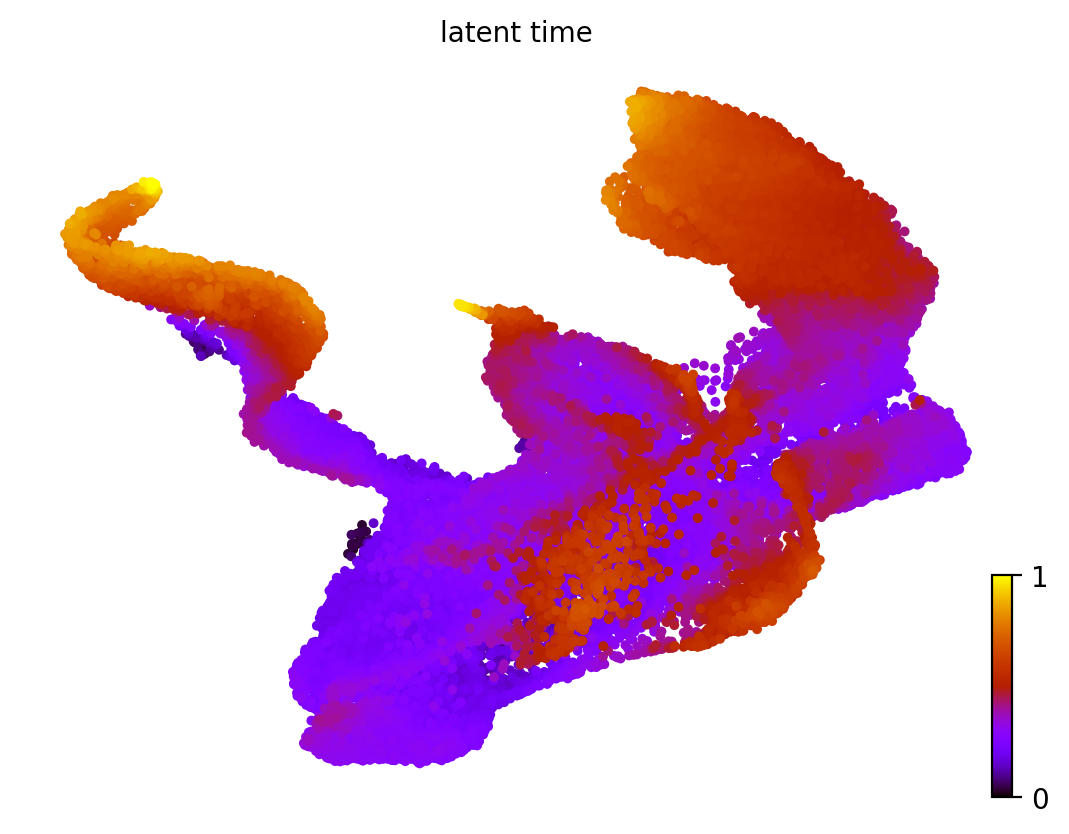

In [75]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=50)

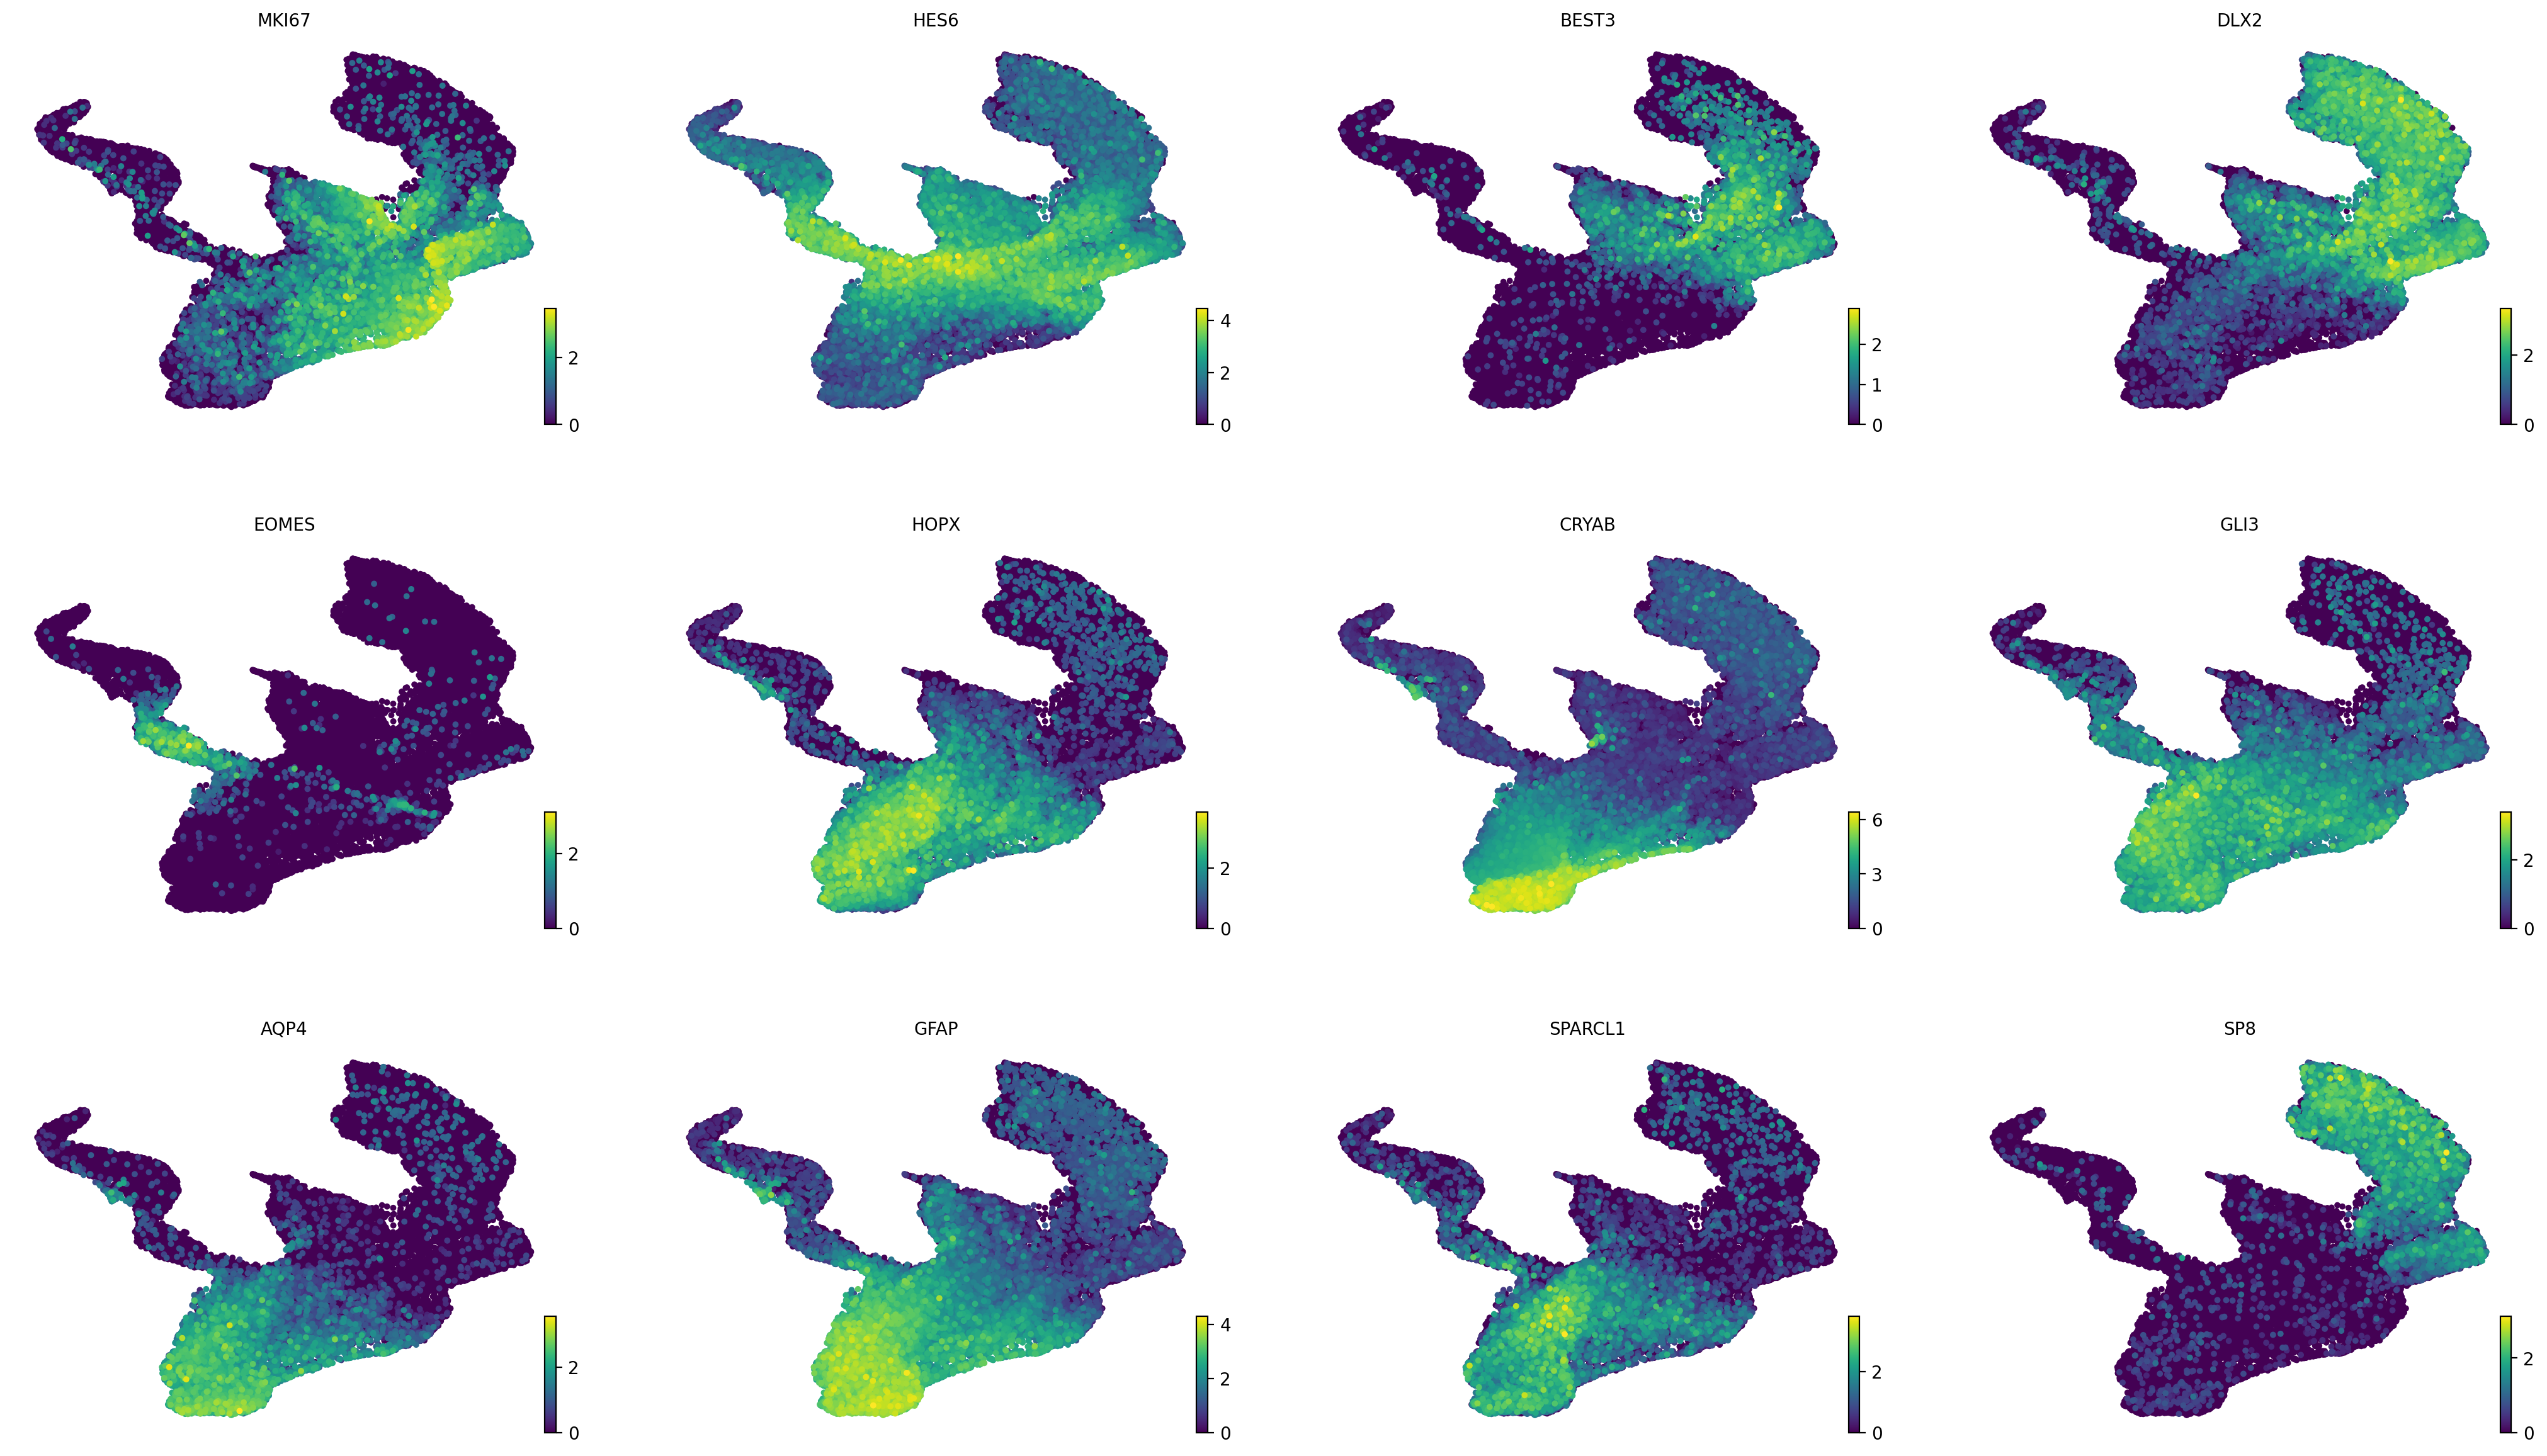

In [66]:
scv.pl.umap(adata, color=["MKI67","HES6","BEST3","DLX2","EOMES",'HOPX',"CRYAB","GLI3","AQP4","GFAP","SPARCL1","SP8"],ncols=4,size=50,frameon=False)

In [4]:
dyn.pp.recipe_monocle(gw15_rep1, normalized = False)

|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----------> <insert> tkey to uns['

/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/dynamo/preprocessing/utils.py:314: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  new_df = origin_df.merge(diff_df[_columns], how="left", left_index=True, right_index=True)
/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/dynamo/preprocessing/utils.py:314: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  new_df = origin_df.merge(diff_df[_columns], how="left", left_index=True, right_index=True)


|-----> <insert> frac to var in AnnData Object.
|-----> size factor normalizing the data, followed by log1p transformation.
|-----> Set <adata.X> to normalized data
|-----> applying PCA ...
|-----> <insert> pca_fit to uns in AnnData Object.
|-----> <insert> ntr to obs in AnnData Object.
|-----> <insert> ntr to var in AnnData Object.
|-----> cell cycle scoring...
|-----> computing cell phase...


/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2747: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


|-----> [cell phase estimation] in progress: 100.0000%
|-----> [cell phase estimation] finished [214.0911s]
|-----> <insert> cell_cycle_phase to obs in AnnData Object.
|-----> <insert> cell_cycle_scores to obsm in AnnData Object.
|-----> [Cell Cycle Scores Estimation] in progress: 100.0000%
|-----> [Cell Cycle Scores Estimation] finished [117.9472s]
|-----> [recipe_monocle preprocess] in progress: 100.0000%
|-----> [recipe_monocle preprocess] finished [199.1973s]


In [5]:
dyn.tl.dynamics(gw15_rep1, model='stochastic', est_method='negbin', cores=32)

|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False
|-----------> removing existing M layers:[]...
|-----------> making adata smooth...
|-----> calculating first/second moments...
|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [210.7075s]


AnnData object with n_obs × n_vars = 44408 × 37481
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'ident', 'cxds_score', 'bcds_score', 'hybrid_score', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'clone', 'n_clone', 'percent.mt', 'Sample', 'short_clone', 'nCount_SCT', 'nFeature_SCT', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'score', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics'
    obs

In [14]:
dyn.tl.cell_velocities(gw15_rep1, method='pearson', other_kernels_dict={'transform': 'sqrt'})

|-----> 0 genes are removed because of nan velocity values.
Using existing pearson_transition_matrix found in .obsp.
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [13.0546s]


AnnData object with n_obs × n_vars = 44408 × 37481
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'ident', 'cxds_score', 'bcds_score', 'hybrid_score', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'clone', 'n_clone', 'percent.mt', 'Sample', 'short_clone', 'nCount_SCT', 'nFeature_SCT', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase', 'leiden'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'score', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_

In [16]:
dyn.tl.cell_wise_confidence(gw15_rep1)

|-----> incomplete neighbor graph info detected: connectivities and distances do not exist in adata.obsp, indices not in adata.uns.neighbors.
|-----> Neighbor graph is broken, recomputing....
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices to uns in AnnData Object.
|-----> <insert> neighbors.params to uns in AnnData Object.


AnnData object with n_obs × n_vars = 44408 × 37481
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'ident', 'cxds_score', 'bcds_score', 'hybrid_score', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'clone', 'n_clone', 'percent.mt', 'Sample', 'short_clone', 'nCount_SCT', 'nFeature_SCT', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase', 'leiden', 'jaccard_velocity_confidence'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'score', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fi

In [ ]:
#dyn.tl.confident_cell_velocities(gw15_rep1, group='group', lineage_dict={'Progenitor': ['terminal_cell_state']},)

|-----> 0 genes are removed because of nan velocity values.
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] finished [173.2270s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [14.4295s]
|-----> X shape: (44408, 2) V shape: (44408, 2)
|-----------> plotting with basis key=X_umap
|-----------> skip filtering leiden by stack threshold when stacking color because it is not a numeric type


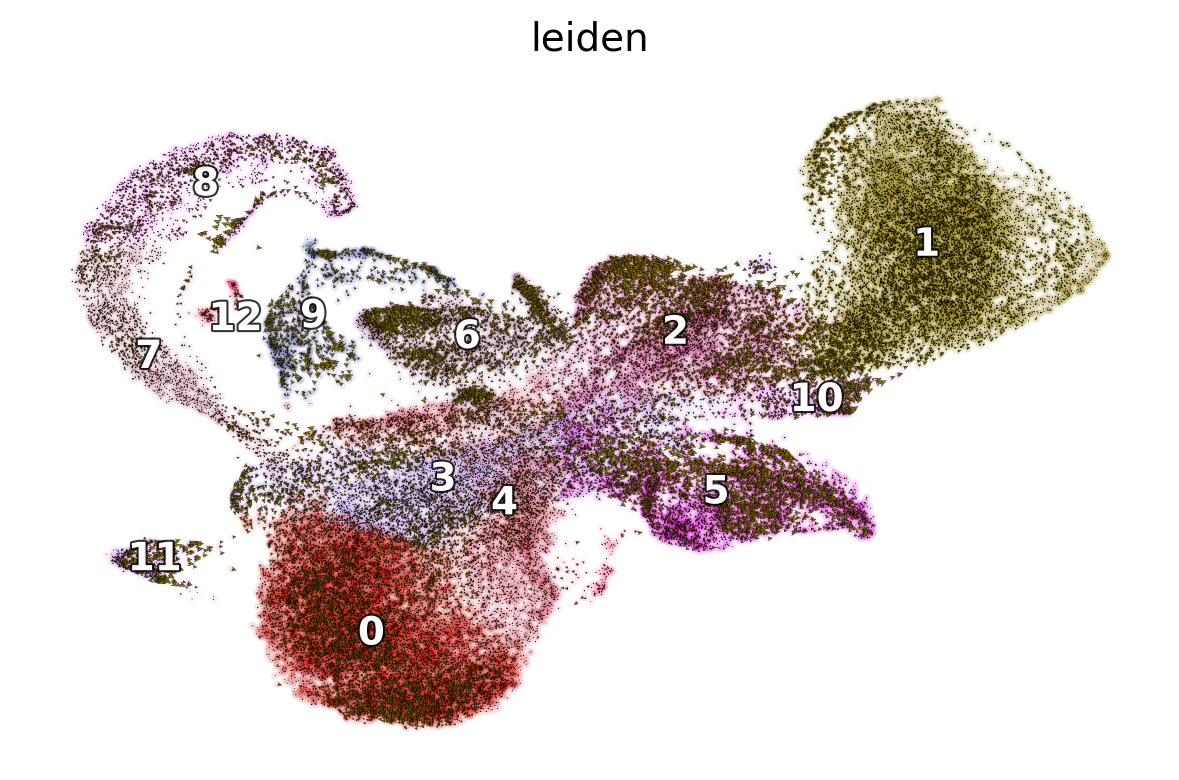

In [13]:
dyn.pl.cell_wise_vectors(gw15_rep1, color=['leiden'], basis='umap', show_legend='on data', quiver_length=6, quiver_size=6, pointsize=0.1, show_arrowed_spines=False)

|-----------> plotting with basis key=X_umap
|-----------> skip filtering leiden by stack threshold when stacking color because it is not a numeric type


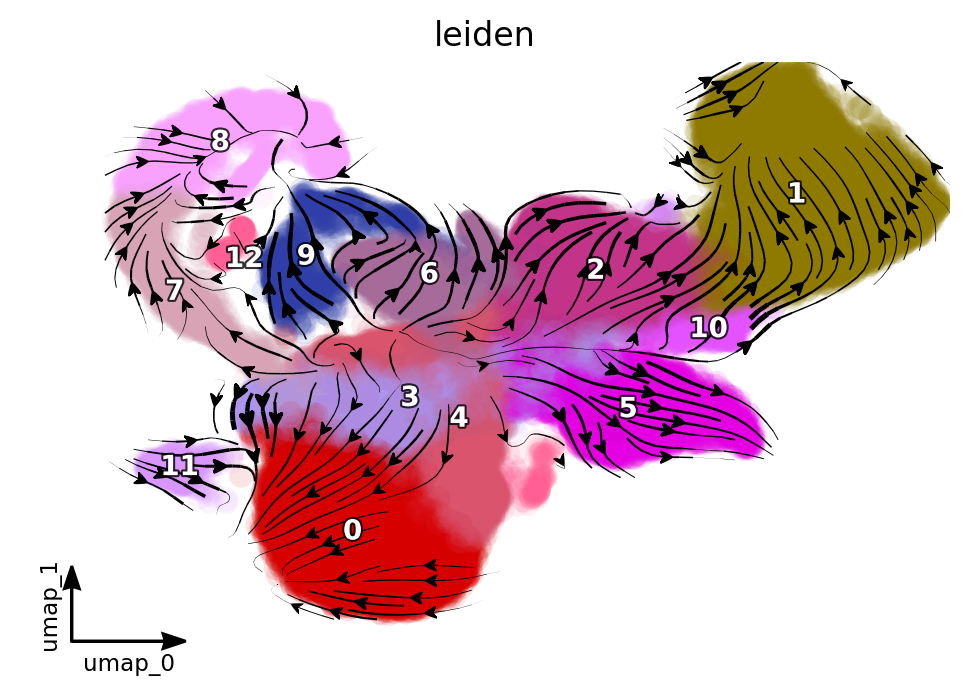

In [17]:
dyn.pl.streamline_plot(gw15_rep1, color=['leiden'], basis='umap', show_legend='on data', show_arrowed_spines=True)

In [18]:
dyn.vf.VectorField(gw15_rep1, basis='umap', M=1000, pot_curl_div=True)

|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: UMAP. 
        Vector field will be learned in the UMAP space.
|-----> Generating high dimensional grids and convert into a row matrix.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> [SparseVFC] in progress: 100.0000%
|-----> [SparseVFC] finished [276.8804s]
|-----> <insert> velocity_umap_SparseVFC to obsm in AnnData Object.
|-----> <insert> X_umap_SparseVFC to obsm in AnnData Object.
|-----> <insert> VecFld_umap to uns in AnnData Object.
|-----> Running ddhodge to estimate vector field based pseudotime in umap basis...
|-----> graphizing vectorfield...
|-----------> calculating neighbor indices...
|-----------> not all cells are used, set diag to 1...
|-----------> Constructing W matrix according upsampling=True and downsampling=True options...
|-----> [ddhodge completed] in progress: 100.

Calculating 2-D curl: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44408/44408 [00:05<00:00, 8477.62it/s]

|-----> Computing divergence...



Calculating divergence: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:04<00:00, 10.11it/s]

|-----> <insert> control_point_umap to obs in AnnData Object.
|-----> <insert> inlier_prob_umap to obs in AnnData Object.


|-----> <insert> obs_vf_angle_umap to obs in AnnData Object.
|-----> [VectorField] in progress: 100.0000%
|-----> [VectorField] finished [646.3572s]


In [19]:
dyn.pl.plot_energy(gw15_rep1)

ValueError: Your adata doesn't have the key for Vector Field with None basis.Try firstly running dyn.vf.VectorField(adata, basis=None).

In [ ]:
dyn.pl.topography(gw15_rep1, basis='umap', background='white', color=['ntr', 'leiden'], streamline_color='black', show_legend='on data', frontier=True)